In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [3]:
dataset = read_csv('../datasets/mnist_data/train.csv')
dataset = dataset.values

In [5]:
X, y = dataset[:, 1:]/255, dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
y_train.shape, y_test.shape

((33600,), (8400,))

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [12]:
y_train.shape, y_test.shape

((33600, 10), (8400, 10))

In [7]:
model = Sequential()

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))

model.add(Dense(64))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Initialize Weights
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          epochs=50,
          batch_size=128,
          validation_data=(X_test, y_test)
         )

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 1s 33us/step - loss: 0.4761 - acc: 0.8735 - val_loss: 0.4724 - val_acc: 0.8724
Epoch 2/50
33600/33600 [==============================] - 1s 35us/step - loss: 0.4692 - acc: 0.8754 - val_loss: 0.4660 - val_acc: 0.8736
Epoch 3/50
33600/33600 [==============================] - 1s 30us/step - loss: 0.4627 - acc: 0.8772 - val_loss: 0.4597 - val_acc: 0.8743
Epoch 4/50
33600/33600 [==============================] - 1s 31us/step - loss: 0.4565 - acc: 0.8782 - val_loss: 0.4536 - val_acc: 0.8751
Epoch 5/50
33600/33600 [==============================] - 1s 31us/step - loss: 0.4507 - acc: 0.8794 - val_loss: 0.4479 - val_acc: 0.8765
Epoch 6/50
33600/33600 [==============================] - 1s 31us/step - loss: 0.4452 - acc: 0.8808 - val_loss: 0.4430 - val_acc: 0.8775
Epoch 7/50
33600/33600 [==============================] - 2s 56us/step - loss: 0.4400 - acc: 0.8817 - val_loss: 0.4377 - val_acc:

In [16]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

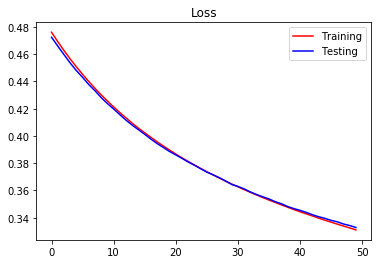

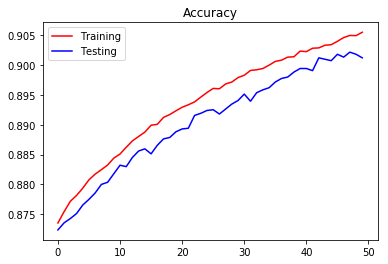

In [21]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()